In [1]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

$\LARGE$
Stationary Schrödinger equation:
$$\LARGE\displaystyle -\frac{\hbar}{2m}\psi''+U(x)\psi(x)=E\psi(x) $$
$\LARGE$
One-dimensional box potential:
$$
\LARGE\displaystyle
\left\{
\begin{array}{lr}
  -U_0, &|x| < a\\
  0, &|x| > a
\end{array}
\right.
$$
$\LARGE$
So, solution for E in ground state is the solution of such transcendental equation (for dimensionless equation):
$$
\LARGE\displaystyle
\cot\sqrt{2a^2U_0(1-\xi)}=\sqrt{\frac{1}{\xi}-1};\ \xi= -\frac{E}{U_0}
$$

$\LARGE$
Let me rewrite it:
$$
\LARGE\displaystyle
\tan\sqrt{2a^2(U_0-e)}=\sqrt{\frac{e}{U_0-e}};\ e=-{E}
$$

$\LARGE$
So, we need solution for such equation:
$$
\LARGE\displaystyle
f(e)=\tan\sqrt{2a^2(U_0-e)}-\sqrt{\frac{e}{U_0-e}}=0
$$

$$
\LARGE\displaystyle
f'(e)=\frac{1}{\cos^2\sqrt{2a^2(U_0-e)}}\frac{-a^2}{\sqrt{2a^2(U_0-e)}}-\frac{1}{2\sqrt{\frac{e}{U_0-e}}}\frac{U_0}{(U_0-e)^2}=0
$$

In [2]:
width = 1.
depth = 1.

# We'll look for a solution for E within these limits:
left = 0
right = depth

plot_step = 1e-3

In [3]:
def f(a, U, e):
    return tan(a * sqrt(2 * (U-e))) - sqrt(e/(U-e))

def df(a, U, e):
    root = a * sqrt(2 * (U - e))
    return (-a**2 ) / (cos(root)**2 * root) - U / (2 * sqrt(e/(U-e)) * (U-e)**2)

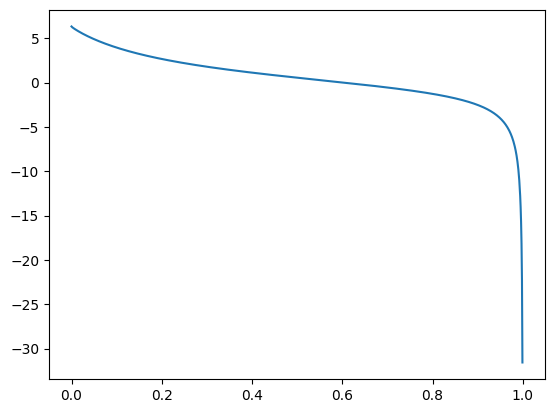

In [4]:
t = np.arange(0, width, plot_step)
F = [f(depth, width, x) for x in t]
plt.figure()
plt.plot(t, F)

# Dichotomy method

In [5]:
def Dichotomy(l, r, prec):
    counter = 0

    while r - l > prec:
        middle = (r+l)/2
        if f(width, depth, middle) * f(width, depth, l) <= 0:
            r = middle
        else:
            l = middle
        counter += 1

    return  (r+l)/2, counter

In [73]:
precision = 1e-5
start = 0.05

res, num = Dichotomy(start, right, precision)
print("There is a root %1.10f. Found in %d iterations" % (res, num))

There is a root 0.6038972855. Found in 17 iterations


# Simple iteration

In [74]:
def Iteration(starting_pt, prec):
    step = 0
    current_point = starting_pt

    while f(width, depth, current_point) > prec:
        current_point = current_point - f(width, depth, current_point)/df(width, depth, starting_pt)
        step += 1
    return (current_point, step)

In [75]:
res, num = Iteration(start, precision)
print("There is a root %1.10f. Found in %d iterations" % (res, num))

There is a root 0.6038963175. Found in 45 iterations


# Newton's method

In [76]:
def Newton(starting_pt, prec):
    step = 0
    current_point = starting_pt

    while f(width, depth, current_point) > prec:
        current_point = current_point - f(width, depth, current_point)/df(width, depth, current_point)
        step += 1
    return (current_point, step)

In [77]:
res, num = Newton(start, precision)
print("There is a root %1.10f. Found in %d iterations" % (res, num))

There is a root 0.6038978513. Found in 4 iterations
